Model trained successfully!


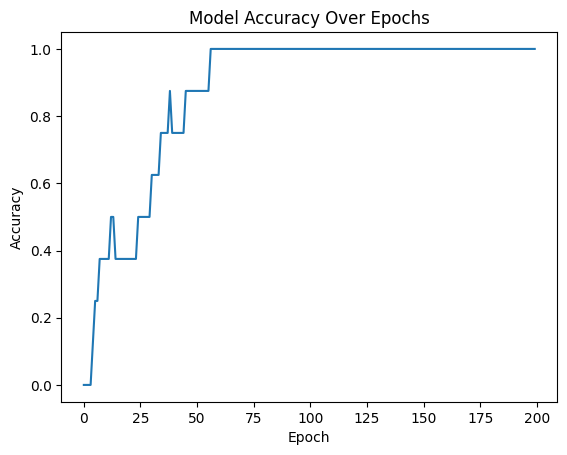


Predictions for next words in sequences:
Input: 'deep' -> Predicted next word: 'learning'
Input: 'deep learning' -> Predicted next word: 'is'
Input: 'deep learning is' -> Predicted next word: 'amazing'
Input: 'deep learning is amazing' -> Predicted next word: 'deep'
Input: 'deep learning is amazing deep' -> Predicted next word: 'learning'
Input: 'deep learning is amazing deep learning' -> Predicted next word: 'builds'
Input: 'deep learning is amazing deep learning builds' -> Predicted next word: 'intelligent'
Input: 'deep learning is amazing deep learning builds intelligent' -> Predicted next word: 'systems'


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

# Sample corpus
data = "Deep learning is amazing. Deep learning builds intelligent systems."

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

sequences = []
words = data.split()

for i in range(1, len(words)):
    seq = words[:i+1]
    sequences.append(' '.join(seq))

# Encode sequences
encoded = tokenizer.texts_to_sequences(sequences)

# Find max sequence length
max_len = max(len(x) for x in encoded)

# Pad sequences and split into X and y
padded = pad_sequences(encoded, maxlen=max_len, padding='pre')

X = np.array([x[:-1] for x in padded])
y = to_categorical([x[-1] for x in padded], num_classes=len(tokenizer.word_index) + 1)

# Build model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=10, input_length=max_len - 1),
    SimpleRNN(50),
    Dense(len(tokenizer.word_index) + 1, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model and save history for plotting
history = model.fit(X, y, epochs=200, verbose=0)

print("Model trained successfully!")

# Plot accuracy improvement over epochs
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Prepare word index for decoding predictions
index_word = {v: k for k, v in tokenizer.word_index.items()}

print("\nPredictions for next words in sequences:")

for i in range(len(X)):
    input_seq = X[i]
    input_words = [index_word.get(idx, '') for idx in input_seq if idx != 0]
    input_text = ' '.join(input_words)

    pred_probs = model.predict(input_seq.reshape(1, -1), verbose=0)
    pred_index = np.argmax(pred_probs)
    pred_word = index_word.get(pred_index, '<UNK>')

    print(f"Input: '{input_text}' -> Predicted next word: '{pred_word}'")
